**Datasets can be downloaded from https://www.dropbox.com/sh/dfqht1ob89ku99d/AACI5ZW3aRuq9MhBfSNS_1O_a?dl=0**  
Ref: Nestorowa, S. et al. A single-cell resolution map of mouse hematopoietic stem and progenitor cell differentiation. Blood 128, e20-31 (2016).

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import stream as st

In [3]:
st.__version__

'0.3.2'

### Read in data

In [4]:
adata=st.read(file_name='./data_Nestorowa.tsv.gz')

Using default working directory.
Saving results in: /Users/hardy/Desktop/tutorial/stream_result


#### read in cell labels and label color

if cell label file or cell color file is not provided, please simply run:

'unknown' will be added as the default label for all cells  
***st.add_cell_labels(adata)***

'random color will be generated for each cell label  
***st.add_cell_colors(adata)***

In [5]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

#### other useful preprocessing steps when dealing with raw-count data

Normalize gene expression based on library size  
***st.normalize_per_cell(adata)***

Logarithmize gene expression  
***st.log_transform(adata)*** 

Remove mitochondrial genes  
***st.remove_mt_genes(adata)*** 

Filter out cells  
***st.filter_cells(adata)*** 

Filter out genes

In [6]:
st.filter_genes(adata,min_num_cells = max(5,int(round(adata.shape[0]*0.001))),
                min_pct_cells = None,expr_cutoff = 1)

Filter genes based on min_num_cells
After filtering out low-expressed genes: 
1656 cells, 4762 genes


239 variable genes are selected


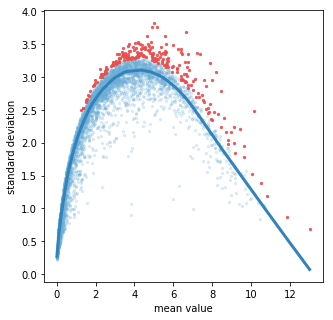

In [7]:
st.select_variable_genes(adata)

In [8]:
st.dimension_reduction(adata)

44 cpus are being used ...


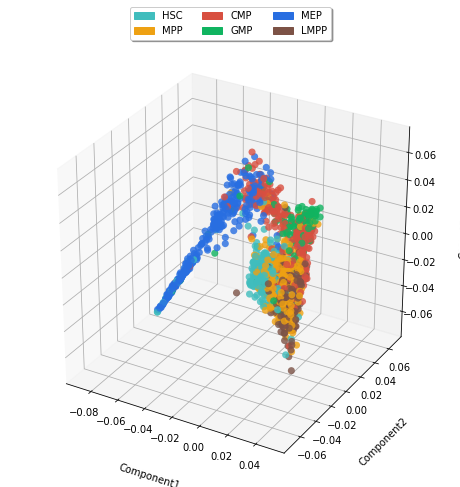

In [9]:
st.plot_dimension_reduction(adata)

In [10]:
st.seed_elastic_principal_graph(adata)

Seeding initial elastic principal graph...
Clustering...
Affinity propagation ...
The number of initial nodes is 27
Calculatng minimum spanning tree...
Number of initial branches: 13


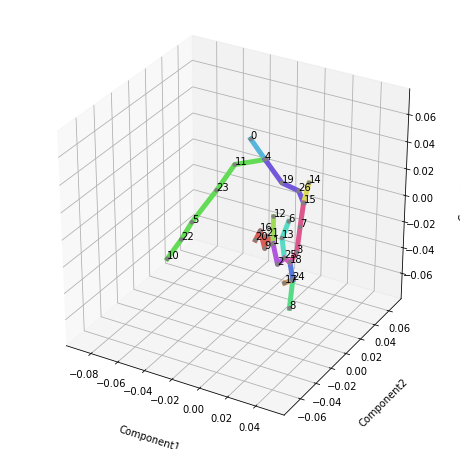

In [11]:
st.plot_branches(adata)

In [12]:
st.elastic_principal_graph(adata)

epg_n_nodes is too small. It is corrected to the initial number of nodes plus incr_n_nodes
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 57 nodes on 1656 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 
50
 
51
 
52
 
53
 
54
 
55
 
56
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||57
	
0.0001008
	
57
	
56
	
51
	
2
	
0
	
0
	
6.104e-05
	
5.878e-05
	
0.9663
	
0.9676
	
3.586e-05
	
3.899e-06
	
0.0002222
	
0.01267
	
0


13.83 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


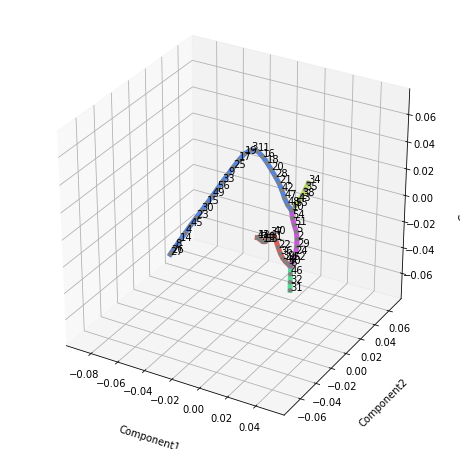

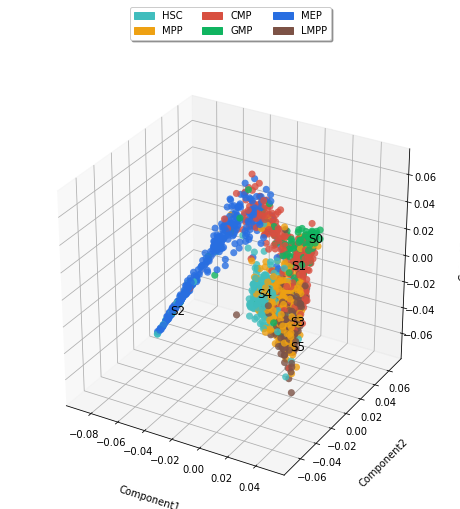

In [13]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 87 nodes on 1656 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 
80
 
81
 
82
 
83
 
84
 
85
 
86
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||87
	
6.702e-05
	
87
	
86
	
81
	
2
	
0
	
0
	
4.285e-05
	
4.116e-05
	
0.9764
	
0.9773
	
1.844e-05
	
5.73e-06
	
0.0004985
	
0.04337
	
0


3.598 sec elapsed

Number of branches after optimizing branching: 5


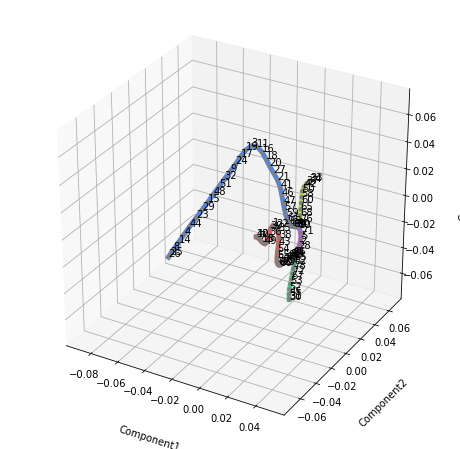

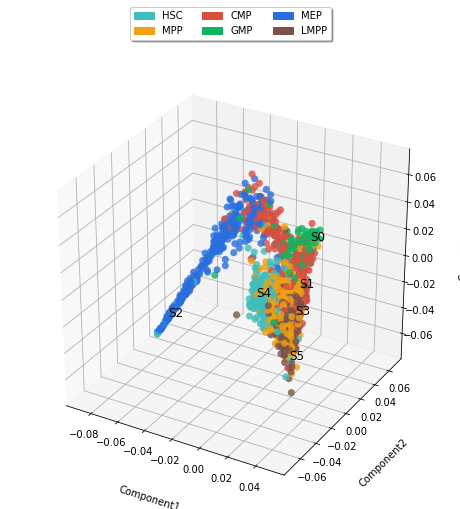

In [14]:
st.optimize_branching(adata,reset=True)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


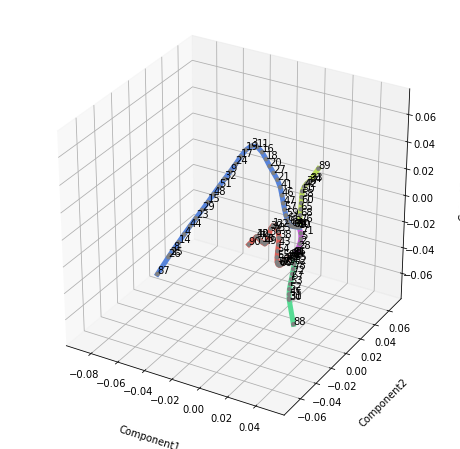

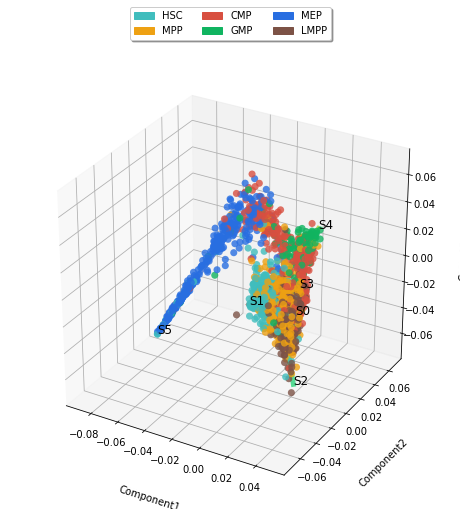

In [15]:
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/stream_tutorial_test/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


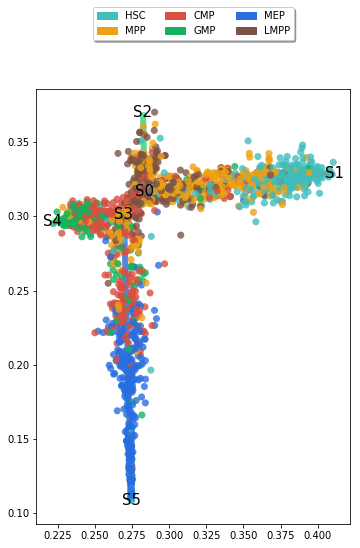

In [16]:
st.plot_flat_tree(adata)

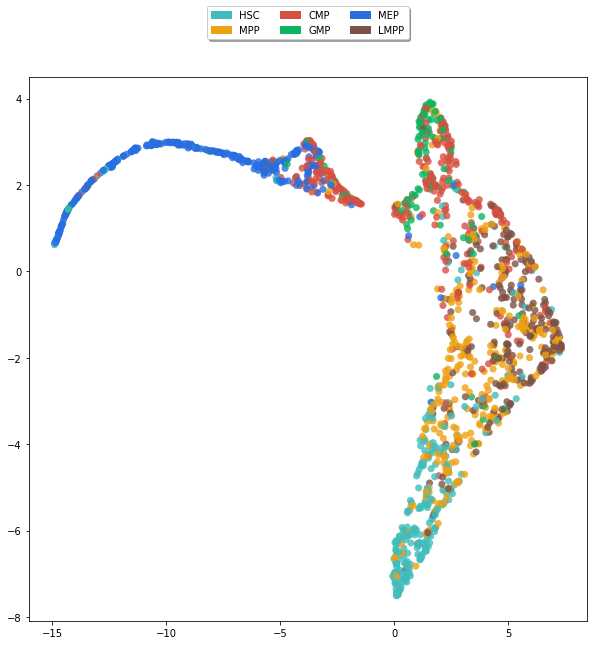

In [17]:
st.plot_visualization_2D(adata,use_precomputed=False)

Importing precomputed umap visualization ...


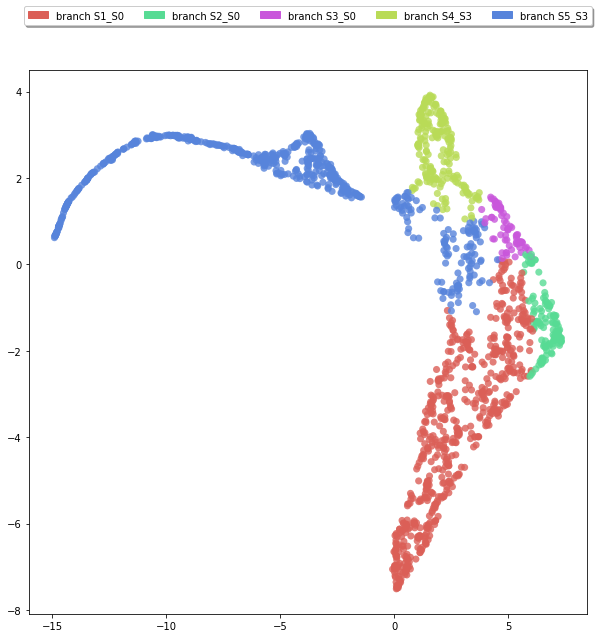

In [18]:
st.plot_visualization_2D(adata,color_by='branch',fig_legend_ncol=6)

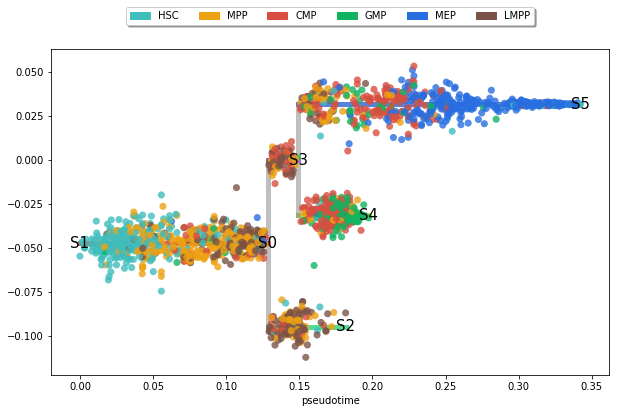

In [19]:
st.subwaymap_plot(adata,percentile_dist=100,root='S1',fig_legend_ncol=6) 

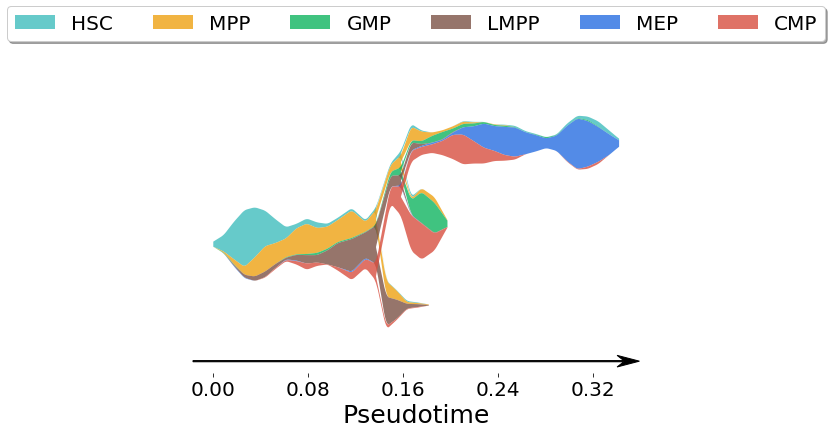

In [20]:
st.stream_plot(adata,root='S1',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.2)

#### The order between horizontal branches from the same parent node has no meaning

#### Users can specify the order preference of nodes themselves

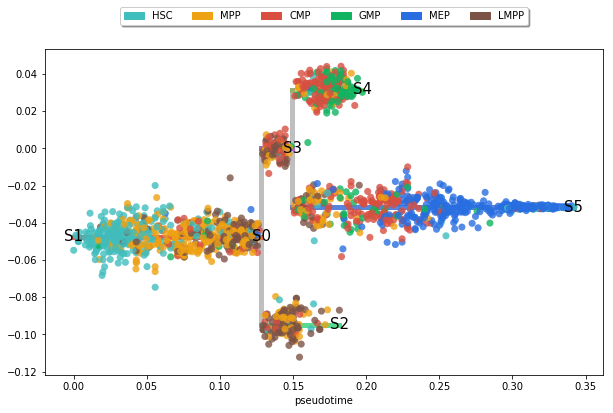

In [21]:
st.subwaymap_plot(adata,percentile_dist=100,root='S1',fig_legend_ncol=6,preference=['S4','S5']) 

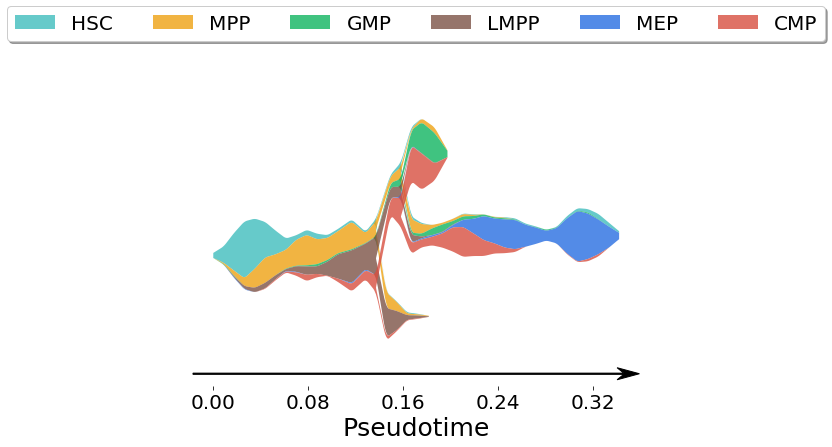

In [22]:
st.stream_plot(adata,root='S1',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.2,preference=['S4','S5'])

In [23]:
st.detect_transistion_genes(adata,root='S1',preference=['S4','S5'])

Minimum number of cells expressing genes: 5


In [24]:
st.detect_de_genes(adata,root='S1',preference=['S4','S5'])

Minimum number of cells expressing genes: 5
Importing precomputed scaled gene expression matrix ...


In [25]:
st.detect_leaf_genes(adata,root='S1',preference=['S4','S5'])

Minimum number of cells expressing genes: 5
Importing precomputed scaled gene expression matrix ...


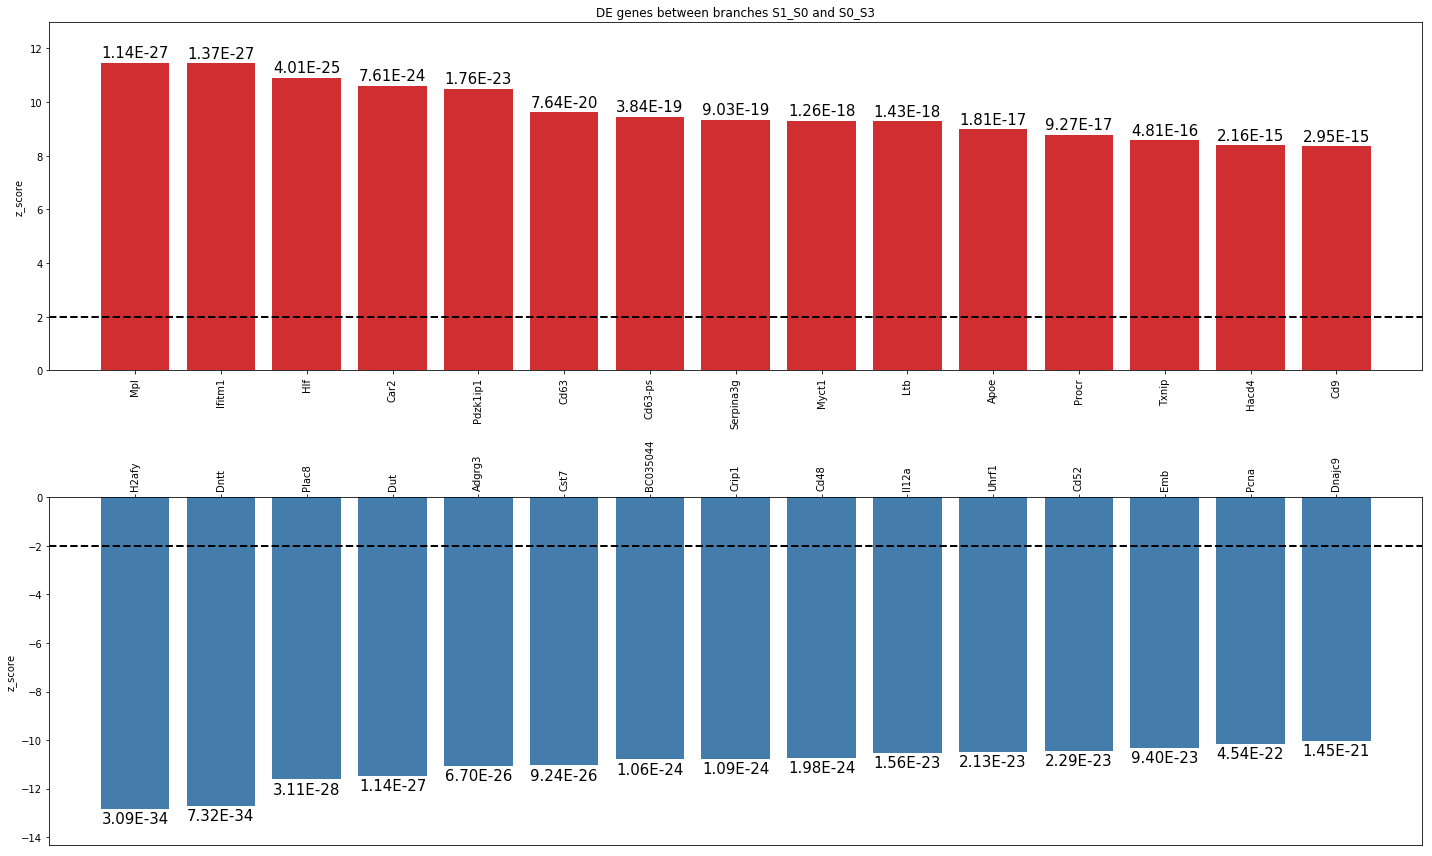

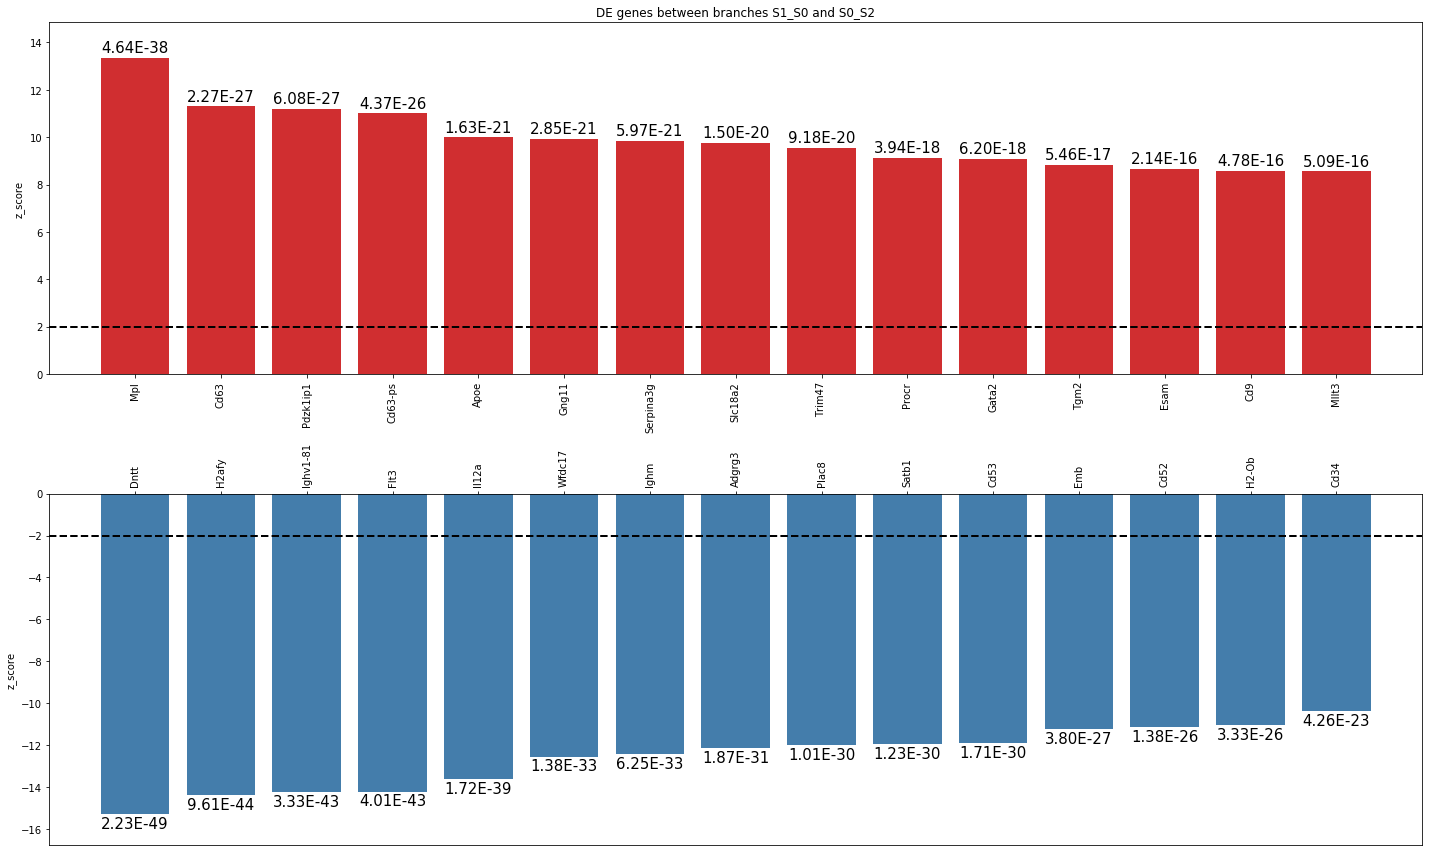

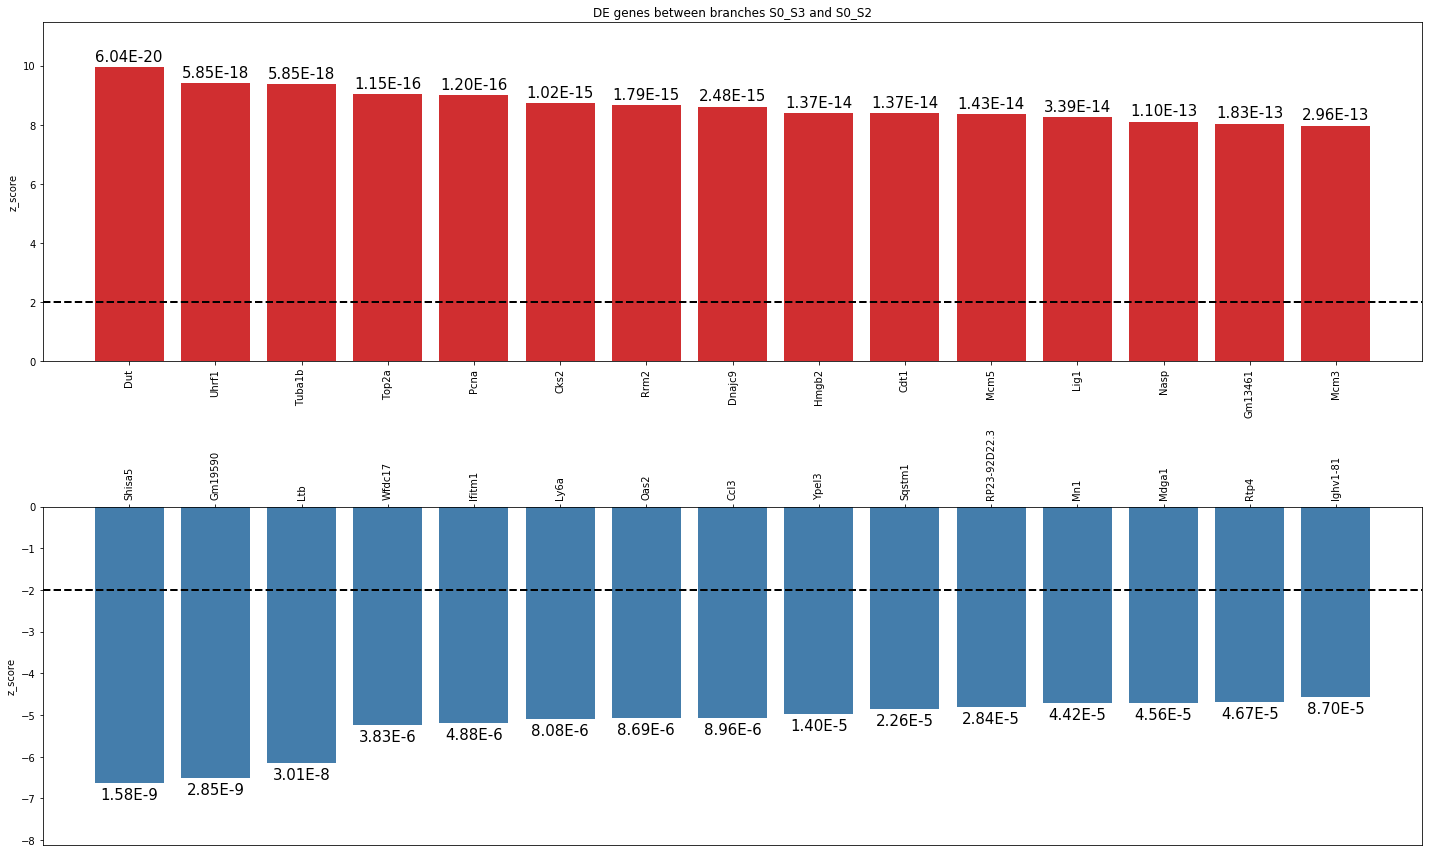

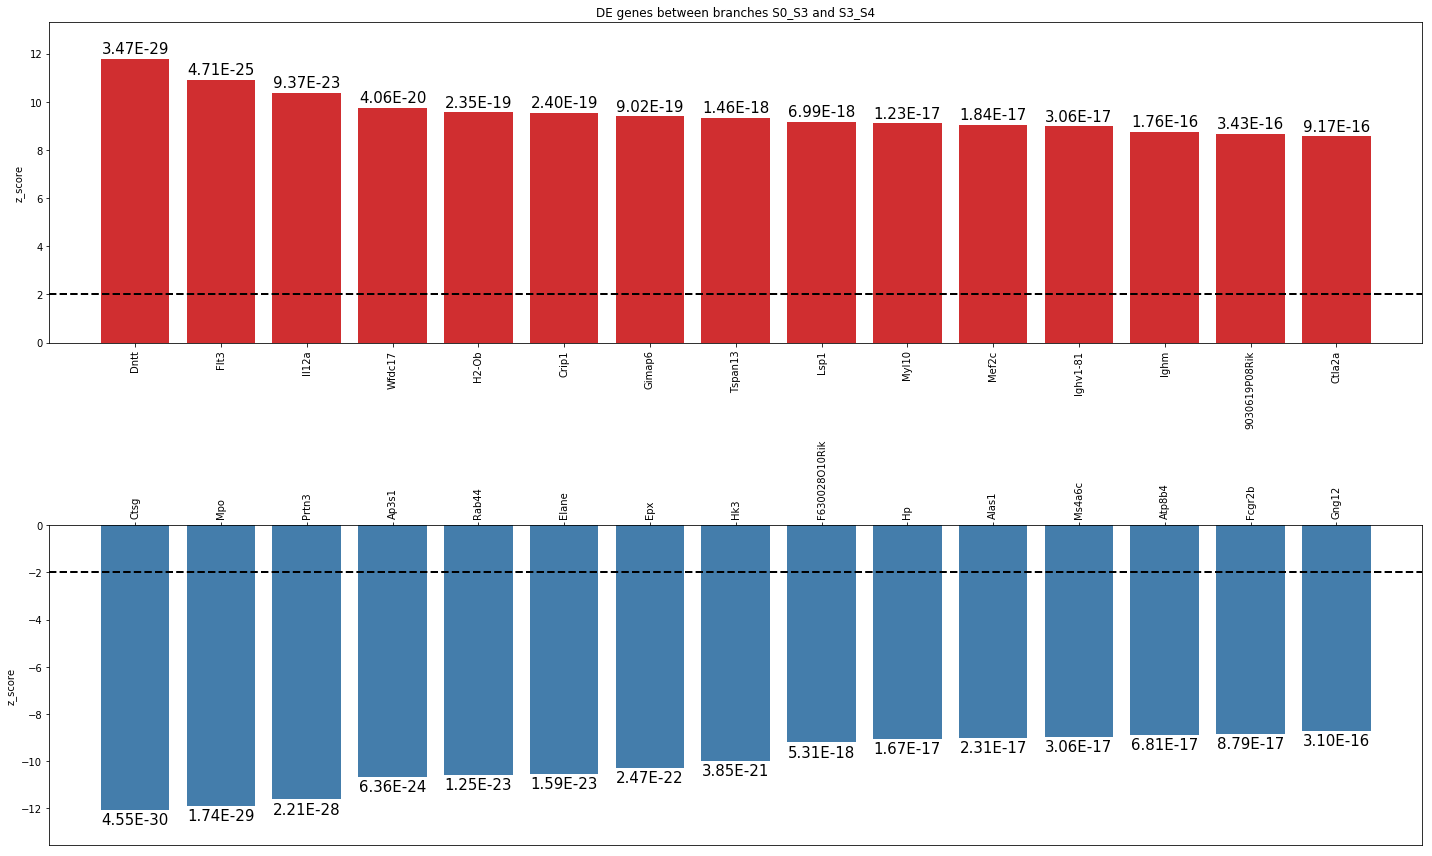

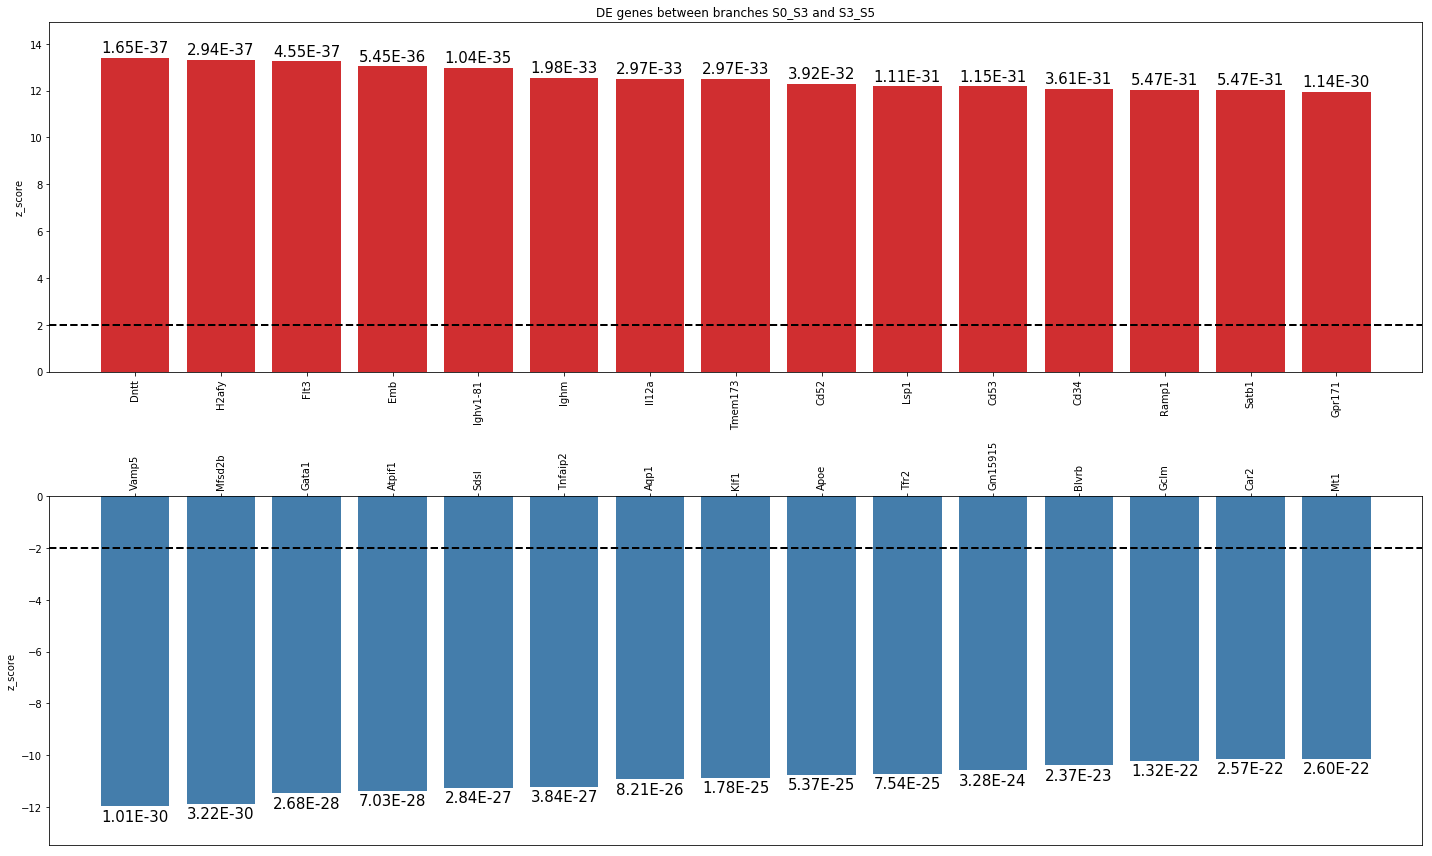

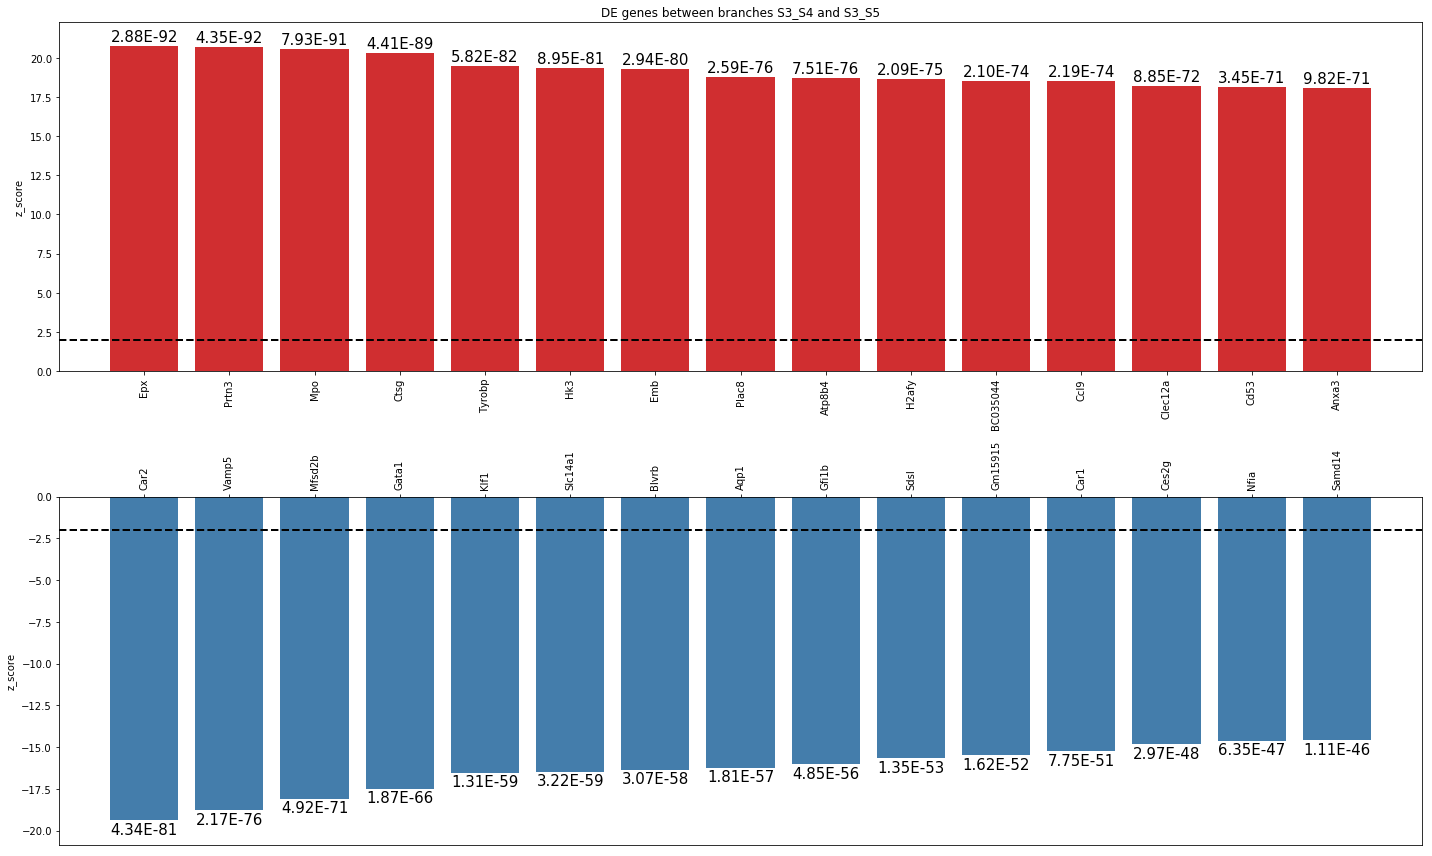

In [26]:
st.plot_de_genes(adata)

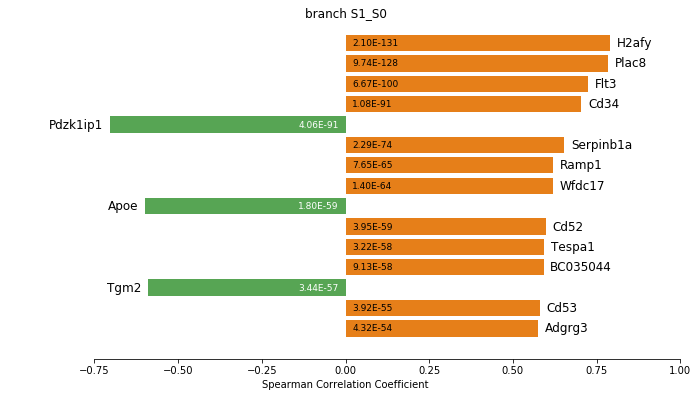

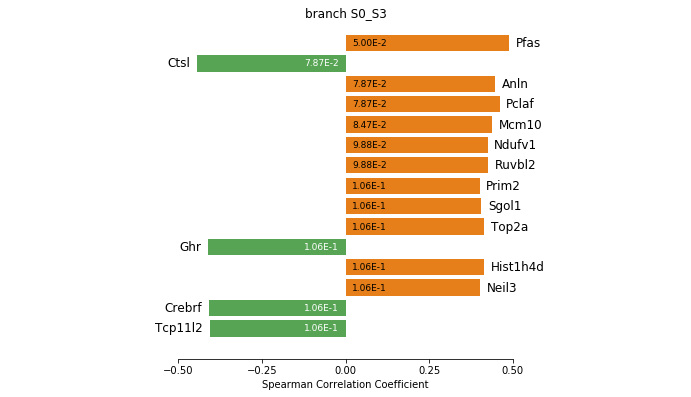

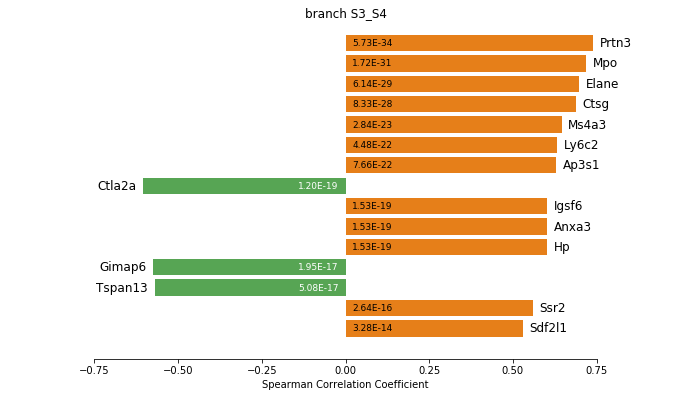

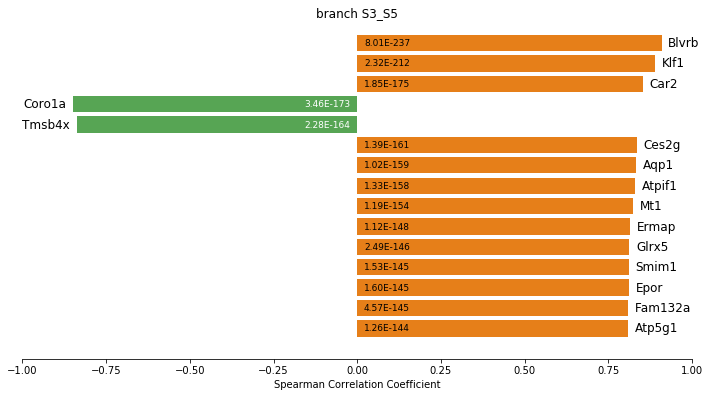

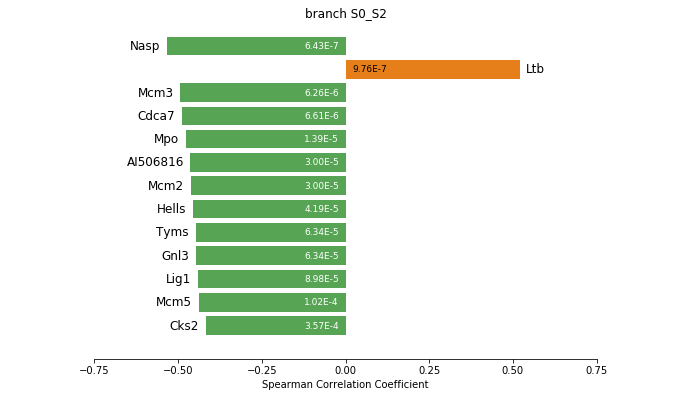

In [27]:
st.plot_transition_genes(adata)

In [28]:
adata.uns['leaf_genes_all']

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S3S4_pvalue,S3S5_pvalue,S0S2_pvalue
Mfsd2b,1.726629,809.243944,4.279824e-175,4.761691e-210,3.398577e-118,1.000000e+00,1.806325e-105
Gata1,1.725642,760.535647,1.566218e-164,1.173254e-187,1.059146e-108,1.000000e+00,1.022642e-99
Mpl,1.681687,754.625644,2.995736e-163,1.000000e+00,1.804223e-146,3.204421e-180,2.051859e-53
Vamp5,1.567308,720.930892,6.072031e-156,2.139050e-132,3.392363e-136,1.000000e+00,2.169523e-107
Epx,1.729550,716.154637,6.592424e-155,1.328854e-197,1.000000e+00,1.907272e-173,2.408490e-97
Emb,-1.563894,711.027323,8.528473e-154,2.466083e-91,9.725059e-152,1.000000e+00,5.927170e-112
Prtn3,1.548280,706.469516,8.302217e-153,1.045701e-80,1.000000e+00,4.458529e-195,7.052369e-57
Lcp1,-1.721216,666.638911,3.595299e-144,6.190332e-144,3.654570e-101,1.000000e+00,1.909084e-86
Klf1,1.727834,666.414603,4.021335e-144,1.999114e-157,1.241086e-90,1.000000e+00,1.912091e-75
Limd2,-1.709481,647.307328,5.586816e-140,1.358276e-155,3.154314e-60,1.000000e+00,3.860242e-85


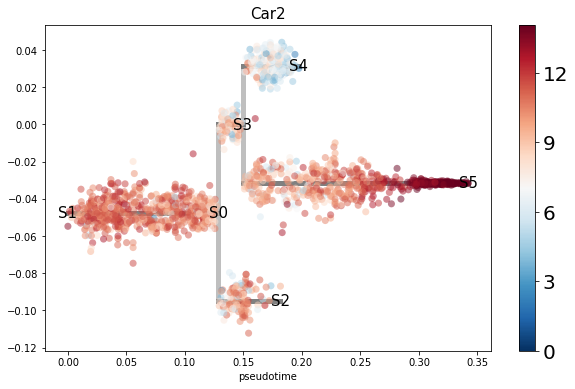

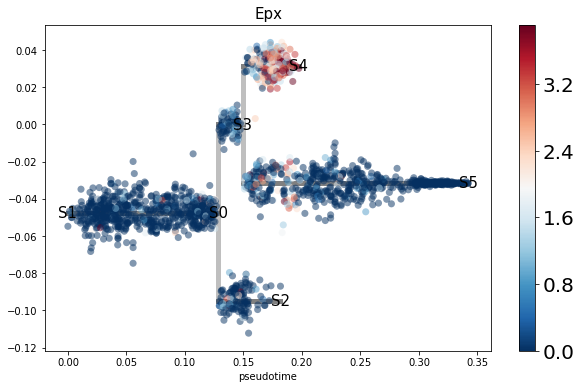

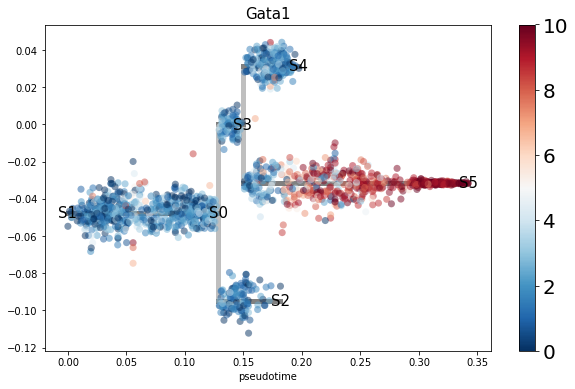

In [29]:
st.subwaymap_plot_gene(adata,percentile_dist=100,root='S1',preference=['S4','S5'],genes=['Gata1','Car2','Epx']) 

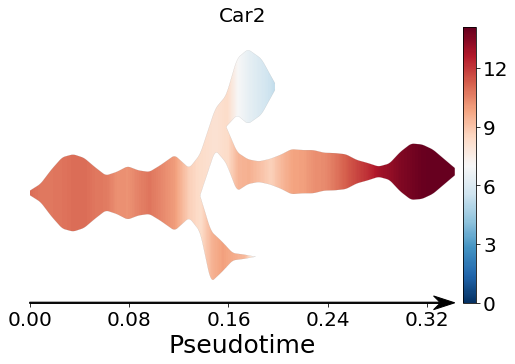

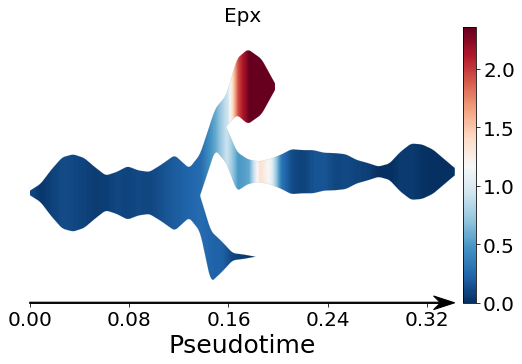

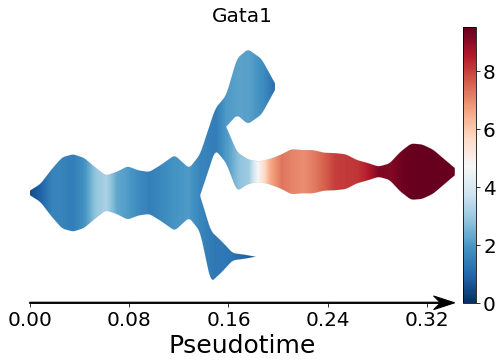

In [30]:
st.stream_plot_gene(adata,root='S1',fig_size=(8,8),factor_min_win=1.2,preference=['S4','S5'],genes=['Gata1','Car2','Epx'])

In [31]:
st.write(adata)